<a href="https://colab.research.google.com/github/bilalProgTech/online-data-science-ml-challenges/blob/master/HackerEarth-Deep-Learning-Snakes-Breed-Challenge/Fastai-Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-deep-learning-challenge-snake-breed-detection/identify-the-snake-breed-5-66d9a9f5/8a95c26e1bab11eb.zip

--2020-12-02 12:10:32--  https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-deep-learning-challenge-snake-breed-detection/identify-the-snake-breed-5-66d9a9f5/8a95c26e1bab11eb.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.124.120
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.124.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100929731 (96M) [application/zip]
Saving to: ‘8a95c26e1bab11eb.zip’

8a95c26e1bab11eb.zi 100%[===================>]  96.25M  9.56MB/s    in 12s     

2020-12-02 12:10:46 (8.01 MB/s) - ‘8a95c26e1bab11eb.zip’ saved [100929731/100929731]



In [ ]:
import pandas as pd
import numpy as np

import shutil
import random
import os
import zipfile

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

In [ ]:
local_zip = '/content/8a95c26e1bab11eb.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('data')
zip_ref.close()

In [ ]:
train = pd.read_csv('/content/data/dataset/train.csv')
test = pd.read_csv('/content/data/dataset/test.csv')
train['image_id'] = train['image_id'] + '.jpg'
test['image_id'] = test['image_id'] + '.jpg'
train.to_csv('/content/data/dataset/train1.csv', index=False)
train.head()

image_id                   breed
0  a8b3ad1dde.jpg   nerodia-erythrogaster
1  8b492b973d.jpg   pantherophis-vulpinus
2  929b99ea92.jpg     thamnophis-sirtalis
3  bbac7385e2.jpg  pantherophis-obsoletus
4  ef776b1488.jpg  agkistrodon-contortrix

In [ ]:
count = 0
for dirname, _, filenames in os.walk('/content/data/dataset/train'):
    for filename in filenames:
        count = count + 1
print(count)

5508


In [ ]:
train_directory = '/content/data/dataset/train'

files_toshow = []
labels_toshow = []

for class_ in train.breed.unique():
    path_train = os.path.join('/content/data/dataset/train')

    filenames = train.groupby('breed')['image_id'].get_group(class_).tolist()
    
    files_toshow.append([(path_train + os.sep  + file)
                          for file in filenames[0:1]])
    labels_toshow.append([class_] * 1)

In [ ]:
from matplotlib.cbook import flatten
files = list(flatten(files_toshow))
target_train = list(flatten(labels_toshow))

In [ ]:
len(files)

35

(72, 128, 3)
(171, 128, 3)
(171, 128, 3)
(228, 128, 3)
(171, 128, 3)
(96, 128, 3)
(96, 128, 3)
(96, 128, 3)
(171, 128, 3)
(72, 128, 3)
(171, 128, 3)
(94, 128, 3)
(85, 128, 3)
(85, 128, 3)
(96, 128, 3)
(85, 128, 3)
(96, 128, 3)
(102, 128, 3)
(62, 128, 3)
(171, 128, 3)
(171, 128, 3)
(96, 128, 3)
(96, 128, 3)
(96, 128, 3)
(96, 128, 3)
(128, 128, 3)
(96, 128, 3)
(85, 128, 3)
(228, 128, 3)
(96, 128, 3)
(171, 128, 3)
(128, 128, 3)
(171, 128, 3)
(171, 128, 3)
(171, 128, 3)


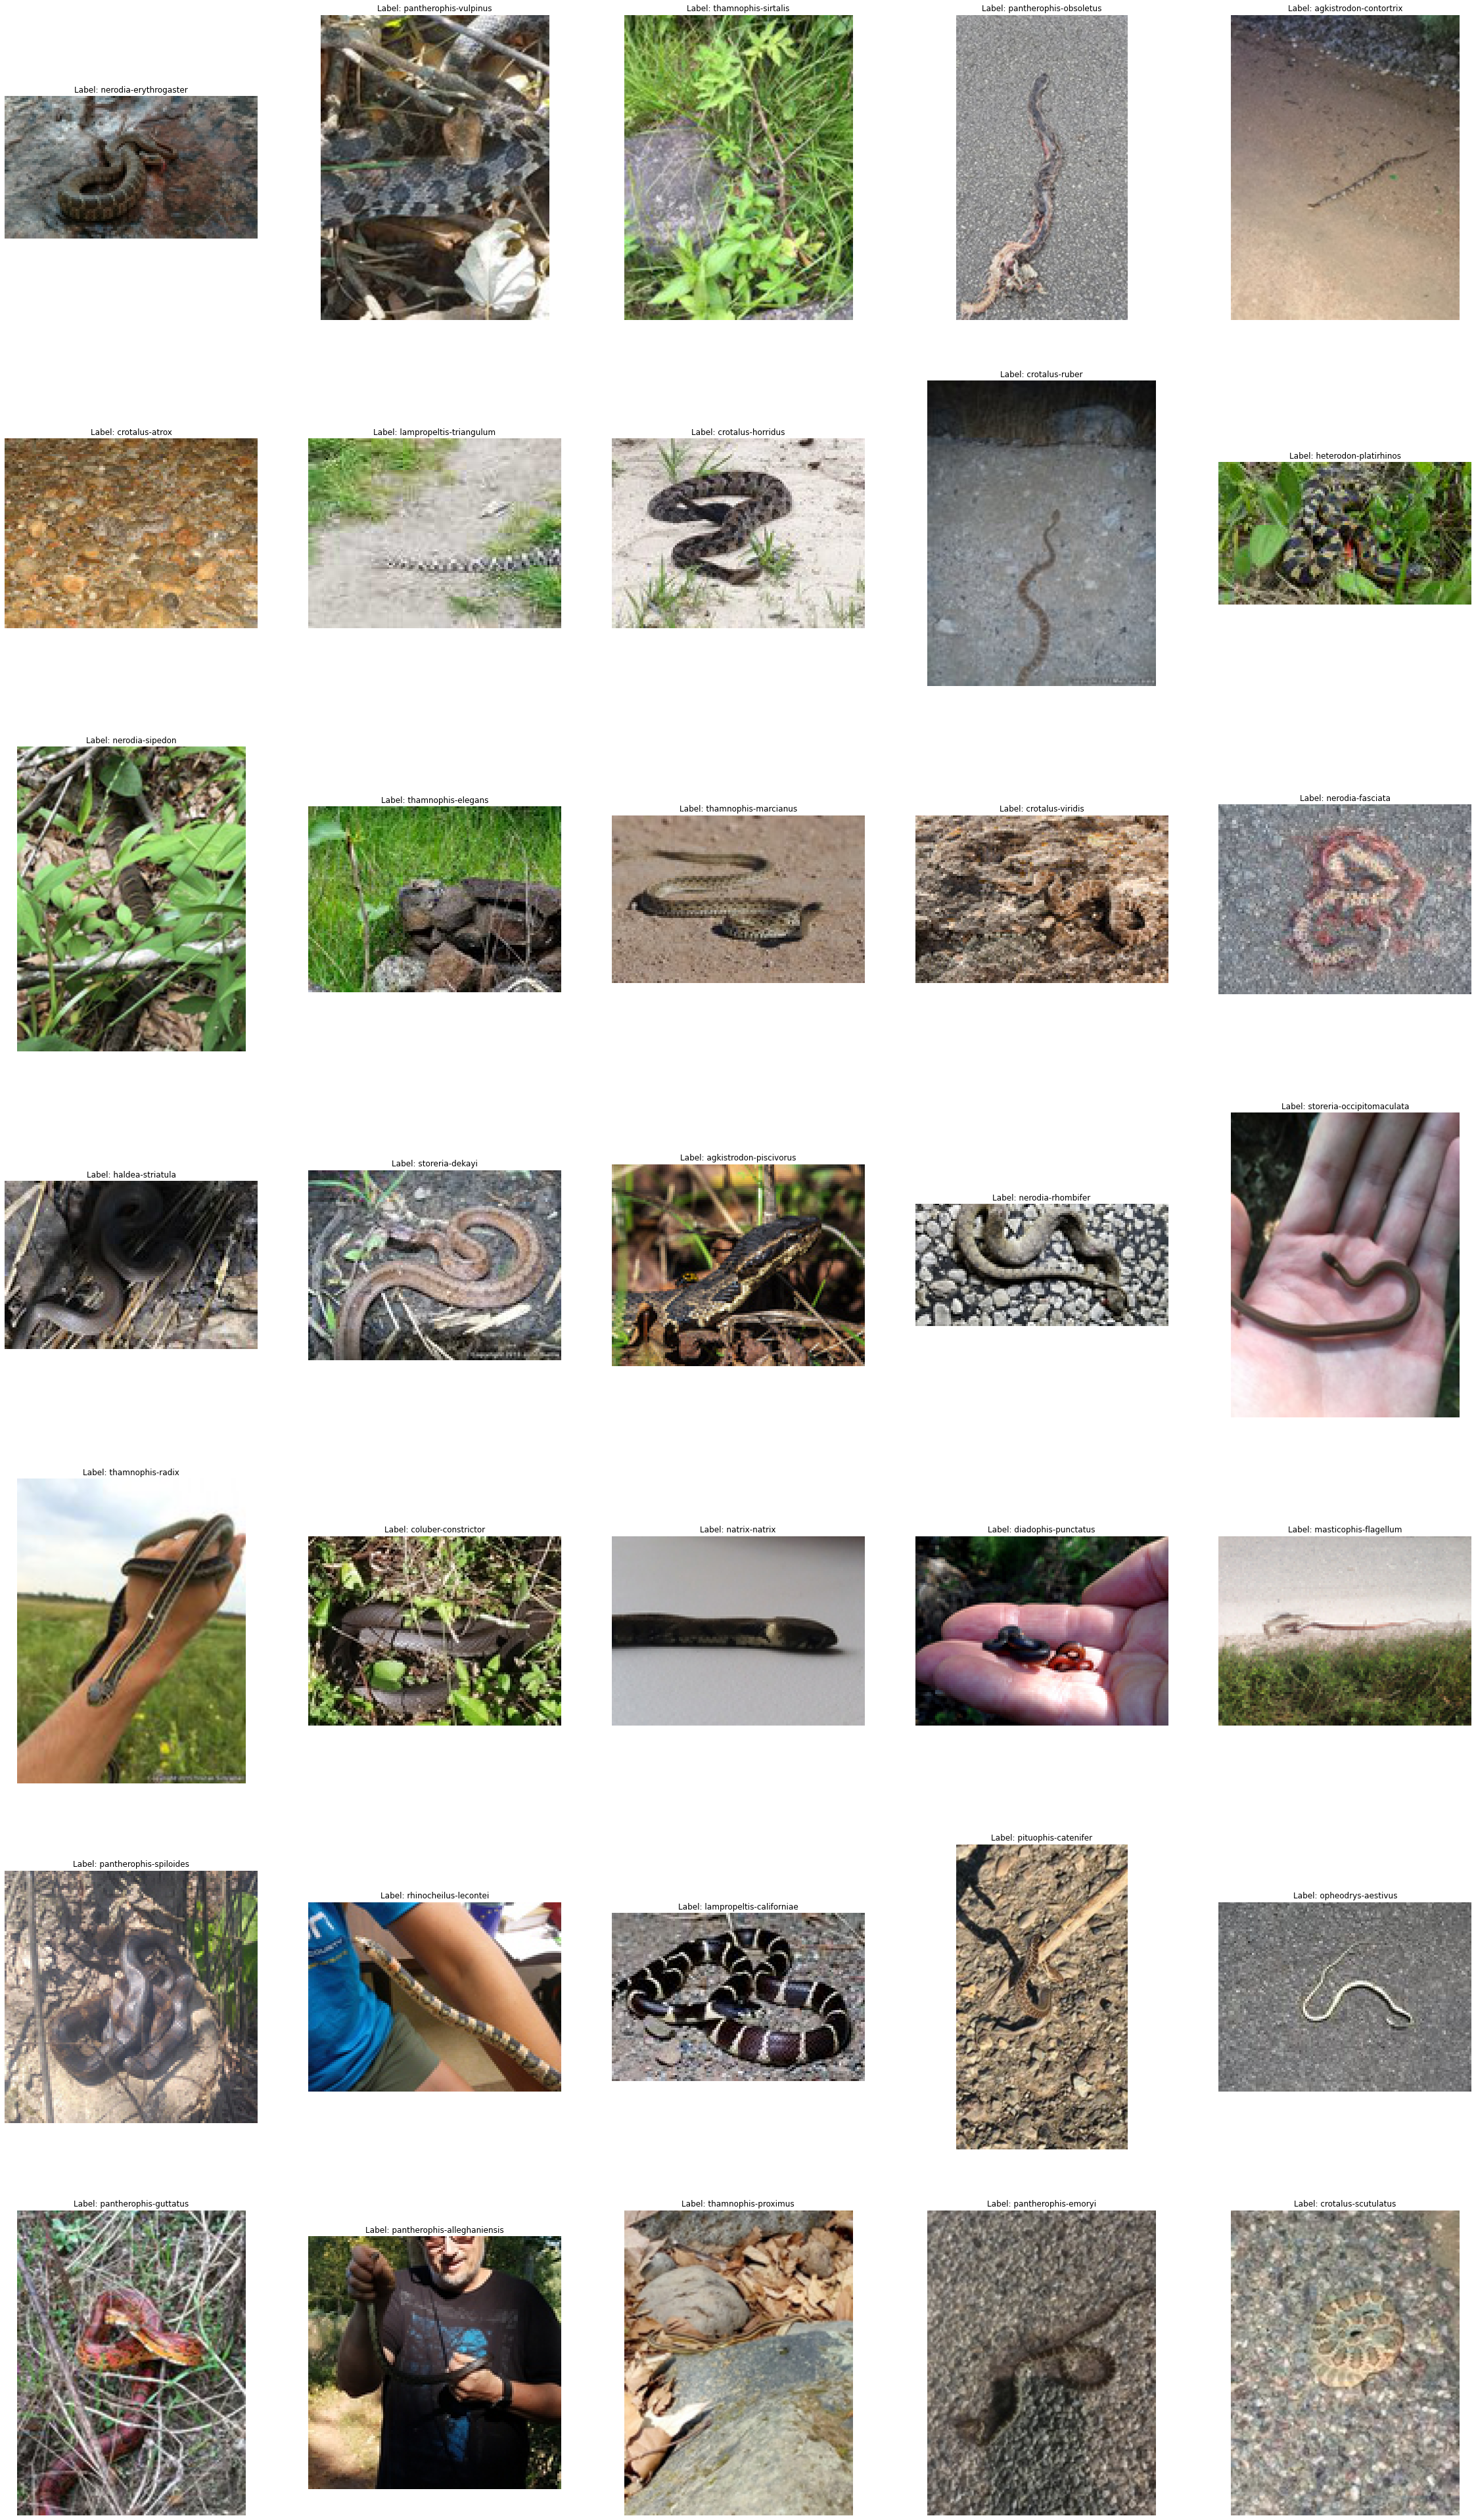

In [ ]:
nrows = 7
ncols = 5
pic_index = 0
fig = plt.gcf()
#plt.figure(figsize=(28,28))
fig.set_size_inches(ncols * 8, nrows * 10)

for i, img_path in enumerate(files):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    print(img.shape)
    plt.title("Label: "+target_train[i])
    plt.imshow(img)

plt.show()

In [ ]:
from fastai.imports import *
from fastai import *
from fastai.vision import *
from torchvision.models import *

In [ ]:
path = '/content/data/dataset/'
test_path = path+'test/'
def get_prediction(learn):
  filename = list(test.image_id)
  label = []
  for fname in filename:
    img = open_image(test_path+fname)
    label.append(learn.predict(img)[0])
    if (len(label)%400 == 0):
      print(str(len(label)) +' images done!')
  return label

In [ ]:
tfms = get_transforms(do_flip = True,
                      max_lighting = 0.2,
                      max_zoom= 1.1,
                      max_warp = 0.15,
                      max_rotate = 45)
data = ImageDataBunch.from_csv(path, folder= 'train',
                               valid_pct = 0.0,
                               csv_labels = '/content/data/dataset/train1.csv',
                               ds_tfms = tfms,
                               fn_col = 'image_id',
                               label_col = 'breed',
                               bs = 8,
                               size = 64).normalize(imagenet_stats)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train['breed'])

LabelEncoder()

In [ ]:
fbeta = FBeta(average='weighted', beta = 1)
learn = cnn_learner(data, models.resnet101, metrics=[accuracy, fbeta])

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


In [ ]:
learn.fit(epochs = 15, lr = 1.5e-4)

In [ ]:
test['res_101'] = get_prediction(learn)
test['res_101'] = test['res_101'].astype('int')
test.head()

400 images done!
800 images done!
1200 images done!
1600 images done!
2000 images done!


image_id  res_101
0  7ede553357.jpg       12
1  3500b219e4.jpg        1
2  d43a78d6d9.jpg       23
3  1f36f26994.jpg       28
4  8cb85fc58e.jpg       23

In [ ]:
del learn
learn = cnn_learner(data, models.densenet121, metrics=[accuracy, fbeta])
learn.fit(epochs = 15, lr = 6e-5)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


In [ ]:
test['dense_121'] = get_prediction(learn)
test['dense_121'] = test['dense_121'].astype('int')
test.head()

400 images done!
800 images done!
1200 images done!
1600 images done!
2000 images done!


image_id  res_101  dense_121
0  7ede553357.jpg       12         18
1  3500b219e4.jpg        1          1
2  d43a78d6d9.jpg       23         23
3  1f36f26994.jpg       28         29
4  8cb85fc58e.jpg       23          4

In [ ]:
del learn
learn = cnn_learner(data, models.densenet161, metrics=[accuracy, fbeta])
learn.fit(epochs = 15, lr = 1e-4)

In [ ]:
test['dense_161'] = get_prediction(learn)
test['dense_161'] = test['dense_161'].astype('int')
test.head()

In [ ]:
del learn
learn = cnn_learner(data, models.resnet152, metrics=[accuracy, fbeta])
learn.fit(epochs = 15, lr = 5e-5)

In [ ]:
test['res_152'] = get_prediction(learn)
test['res_152'] = test['res_152'].astype('int')
test.head()

In [ ]:
del learn
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, fbeta])
learn.fit(epochs = 15, lr = 1.5e-4)

In [ ]:
test['res_50'] = get_prediction(learn)
test['res_50'] = test['res_50'].astype('int')
test.head()

In [ ]:
test = test.drop(['Category'], axis = 1)
test['Category'] = test.mode(axis = 1, numeric_only = True)
test.head()

In [ ]:
submission = pd.read_csv('/content/data/dataset/test.csv')
submission['breed'] = encoder.inverse_transform(test['Category'])
submission.to_csv('all_model.csv', index = False)
submission.head()

In [ ]:
submission.shape